In [1]:
cd Diff-SCM-main

/Users/neha-mac/Documents/Diff-CF/Diff-SCM-main


In [11]:
!python /Users/neha-mac/Documents/Diff-CF/Diff-SCM-main/diff_scm/sampling/sample_counterfactual.py

mnist
Logging to /Users/neha-mac/Documents/Diff-CF/experiment_data/exp_02_MNIST/counterfactual_sampling_class
creating loader...
root-dir /Users/neha-mac/Documents/Diff-CF/Diff-SCM-main/remote/rds/groups/idcom_imaging/data/Brain/BRATS/MNIST
creating model and diffusion...
EncoderUNetModel(
  (time_embed): Sequential(
    (0): Linear(in_features=32, out_features=128, bias=True)
    (1): SiLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
  )
  (input_blocks): ModuleList(
    (0): TimestepEmbedSequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (1): TimestepEmbedSequential(
      (0): ResBlock(
        (in_layers): Sequential(
          (0): GroupNorm32(32, 32, eps=1e-05, affine=True)
          (1): Identity()
          (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (h_upd): Identity()
        (x_upd): Identity()
        (emb_layers): Sequential(
          (0): SiLU()
          (1): L

In [19]:
import numpy as np
npzfile = np.load("/Users/neha-mac/Documents/Diff-CF/experiment_data/exp_02_MNIST/counterfactual_sampling_class/samples2.npz",allow_pickle=True)
file = npzfile['arr_0']

In [25]:
import matplotlib
from matplotlib import pyplot as plt
import torch as th

In [21]:
img = file[0]['original']['image'][1][0]

In [26]:
results_per_sample = {"original": ((file[0]['original']['image'] + 1) * 127.5).clamp(0, 255).to(
    th.uint8)}

In [29]:
counterfactual = ((file[0]['counterfactual_sample'] + 1) * 127.5).clip(0, 255)
results_per_sample["counterfactual"] = counterfactual

In [30]:
sample_list = np.stack([v[:,0] for (k,v) in results_per_sample.items()])
sample_list = np.einsum("ibwh -> bihw",sample_list)
sample_list = sample_list[:16]
grid = np.concatenate(np.concatenate(sample_list,axis = 2),axis = 0)

(-0.5, 447.5, 55.5, -0.5)

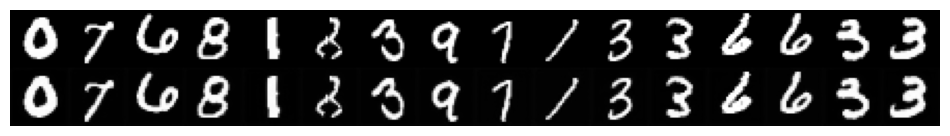

In [31]:
fig = plt.figure(figsize=(12.,40.))
plt.imshow(grid,cmap = 'gray')
plt.axis("off")

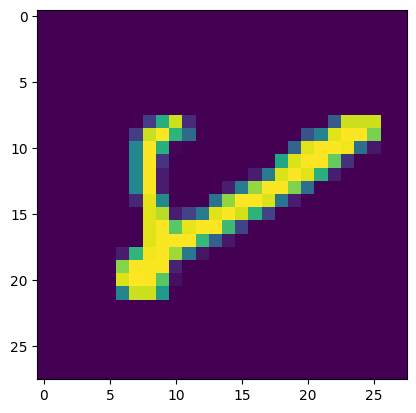

In [22]:
plt.imshow(img)

In [23]:
cf_img = file[0]['counterfactual_sample'][1][0]

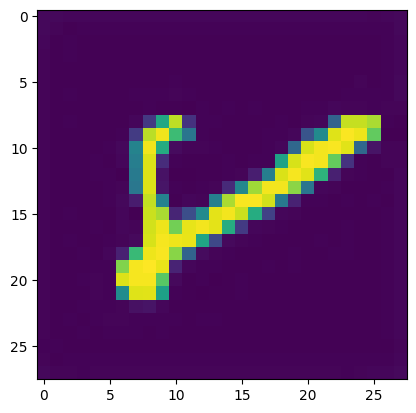

In [24]:
plt.imshow(cf_img)